<a href="https://colab.research.google.com/github/SmurZik/Telecom/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для начала импортируем необходимые библиотеки и файлы:

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Spectrum, Wave, Noise
from thinkdsp import decorate, read_wave, unbias, normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

--2024-03-31 17:10:20--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-03-31 17:10:20--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.01s   

2024-03-31 17:10:20 (3.87 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



# Упражнение 4.1
На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др. На веб-странице http://asoftmurmur.com/about/ приведен перечень записей; большинство из них хранится на http://freesound.org.

Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли их спектр мощности на белый, розовый или броуновский шум? Как спектр меняется во времени?

Для выполнения задания мною были выбраны следующие звуки: звук ветра, звук ручья, звук костра

In [2]:
if not os.path.exists('campfire.wav'):
  !wget https://github.com/SmurZik/Telecom/raw/main/campfire.wav

if not os.path.exists('creek.wav'):
  !wget https://github.com/SmurZik/Telecom/raw/main/creek.wav

if not os.path.exists('wind.wav'):
  !wget https://github.com/SmurZik/Telecom/raw/main/wind.wav

--2024-03-31 17:14:19--  https://github.com/SmurZik/Telecom/raw/main/campfire.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SmurZik/Telecom/main/campfire.wav [following]
--2024-03-31 17:14:19--  https://raw.githubusercontent.com/SmurZik/Telecom/main/campfire.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6667998 (6.4M) [application/octet-stream]
Saving to: ‘campfire.wav’

campfire.wav        100%[===================>]   6.36M  --.-KB/s    in 0.08s   

2024-03-31 17:14:19 (79.9 MB/s) - ‘campfire.wav’ saved [6667998/6667998]

--2024-03-31 17:14:19--  https://github.com/SmurZik/Telecom/r

In [3]:
wind_segment = read_wave('wind.wav').segment(start=2.0, duration=1.0)
wind_segment.make_audio()

Выведем спектр полученного звука:

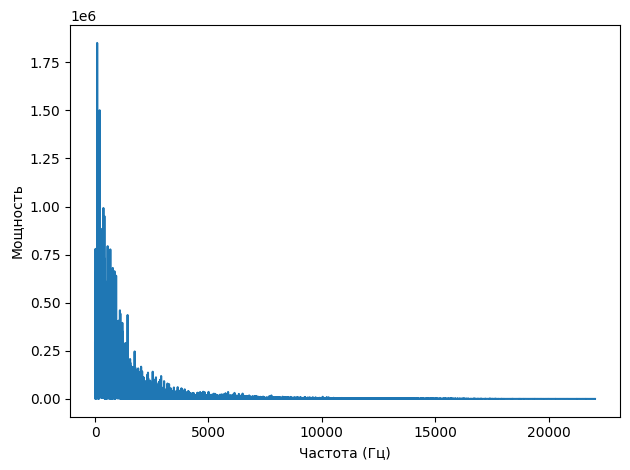

In [4]:
wind_spectrum = wind_segment.make_spectrum()
wind_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

По спектру видно, что амплитуда падает с увеличением частоты, следовательлно это либо красный, либо розовый шум.
Для того, чтобы определить более конкретно, распечатаем спектр мощности в логарифмечиской шкале:

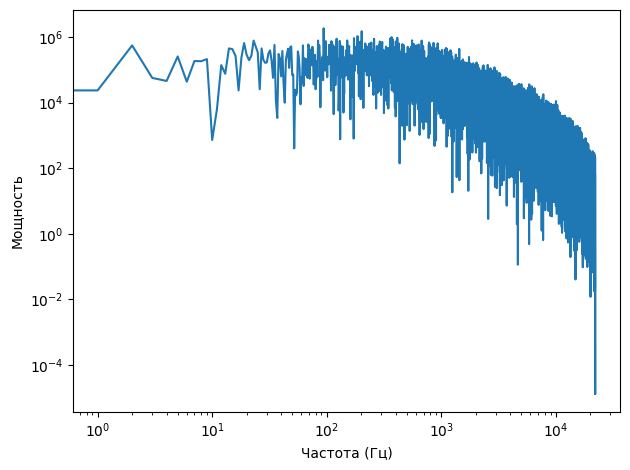

In [5]:
wind_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [6]:
wind_spectrum.estimate_slope().slope

-2.0945833127993216

По графику можем увидеть, что взаимосвязь между мощностью и частотой размытая, но строго линейная, следовательно, можем сделать вывод, что это красный шум. Также об этом нам говорить значение, полученное с помощью estimate_slope, так как уклон спектра мощности у этого шума как раз равен -2.

Для того, чтобы посмотреть как спектр меняется во времени, выберем второй сегмент из первоначального звука:

In [7]:
wind_segment2 = read_wave('wind.wav').segment(start=3.0, duration=1.0)
wind_segment2.make_audio()

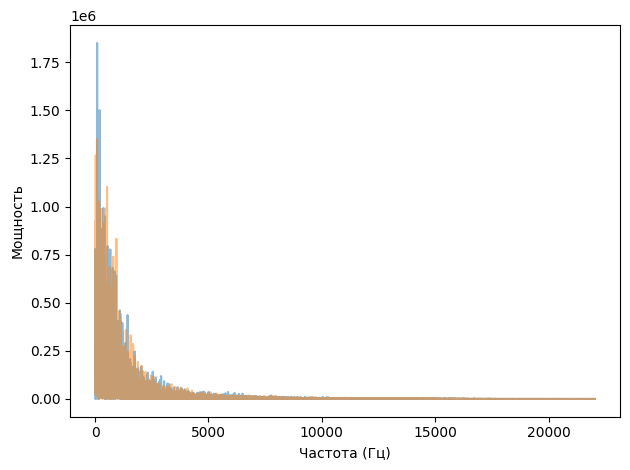

In [8]:
wind_spectrum2 = wind_segment2.make_spectrum()
wind_spectrum.plot_power(alpha=0.5)
wind_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

И также построим графи спектра в логарифмической форме

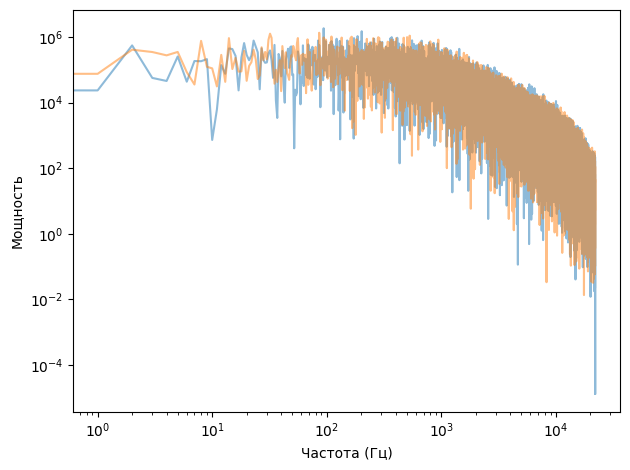

In [9]:
wind_spectrum.plot_power(alpha=0.5)
wind_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [10]:
wind_spectrum2.estimate_slope().slope

-2.103676182972255

Можем увидеть, что второй спектр второго сегмента также больше всего напоминает красный шум

Теперь рассмотрим звук ручья. Для удобства буду сразу рассматривать два сегмента и сразу в логарифмическом формате.

In [15]:
creek_segment = read_wave('creek.wav').segment(start=1.0, duration=1.0)
creek_segment.make_audio()

In [16]:
creek_segment2 = read_wave('creek.wav').segment(start=3.0, duration=1.0)
creek_segment2.make_audio()

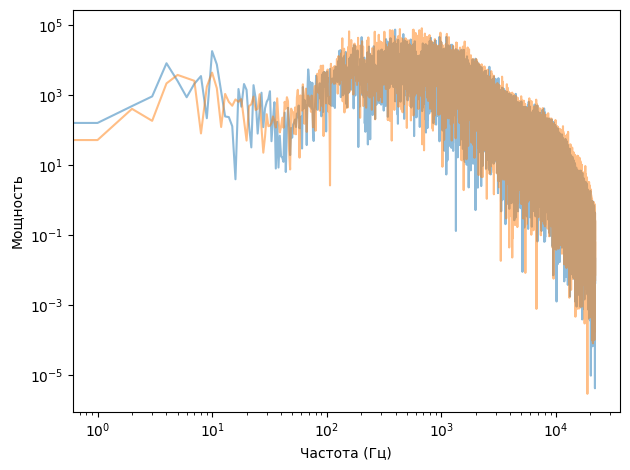

In [17]:
creek_spectrum = creek_segment.make_spectrum()
creek_spectrum2 = creek_segment2.make_spectrum()
creek_spectrum.plot_power(alpha=0.5)
creek_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [18]:
creek_spectrum.estimate_slope().slope

-2.8011976472001003

In [19]:
creek_spectrum2.estimate_slope().slope

-2.7042039233700574

По началу график напоминает розовый шум, однако после частоты 100Гц можем опять наблюдать линейное изменение.

Рассмотрим последний звук - звук костра.

In [20]:
fire_segment = read_wave('campfire.wav').segment(start=4.0, duration=1.0)
fire_segment.make_audio()

In [21]:
fire_segment2 = read_wave('campfire.wav').segment(start=20.0, duration=1.0)
fire_segment2.make_audio()

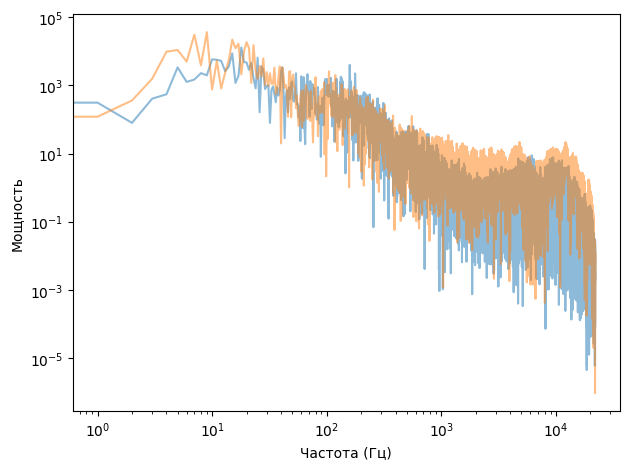

In [22]:
fire_spectrum = fire_segment.make_spectrum()
fire_spectrum2 = fire_segment2.make_spectrum()
fire_spectrum.plot_power(alpha=0.5)
fire_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [23]:
fire_spectrum.estimate_slope().slope

-1.3363008278822852

In [24]:
fire_spectrum2.estimate_slope().slope

-1.0402333986311618

В данном случае графк ближе к розовому шуму. Мы уже не можем наблюдать линейной зависимости между мощностью и частотой, также об этом говорит значение, полученное с помощью estimate_slope.

# Упражнение 4.2
В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех частотах одинакова, а на коротком мощность на каждой частоте случайна.

Для оценки долговременной средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а затем найти среднее по сегментам.

Реализуйте метод Бартлетта и используйте его для оценки спектра мощности шумового сигнала. Подсказка: посмотрите на реализацию make_spectrogram.

Код метода Бартлетта представлен ниже:

In [27]:
def bartlett_method(wave, seg_length=512, win_flag=True):
  spectrum = wave.make_spectrogram(seg_length, win_flag)
  segments = spectrum.spec_map.values()

  power_segments = []
  for segment in segments:
    power_segments.append(segment.power)

  hs = np.sqrt(sum(power_segments)/len(power_segments))
  fs = next(iter(segments)).fs

  spectrum = Spectrum(hs, fs, wave.framerate)
  return spectrum

Исследуем работу алгоритма на используемых выше сегментах.

In [28]:
wind_res = bartlett_method(wind_segment)
wind_res2 = bartlett_method(wind_segment2)

creek_res = bartlett_method(creek_segment)
creek_res2 = bartlett_method(creek_segment2)

fire_res = bartlett_method(fire_segment)
fire_res2 = bartlett_method(fire_segment2)

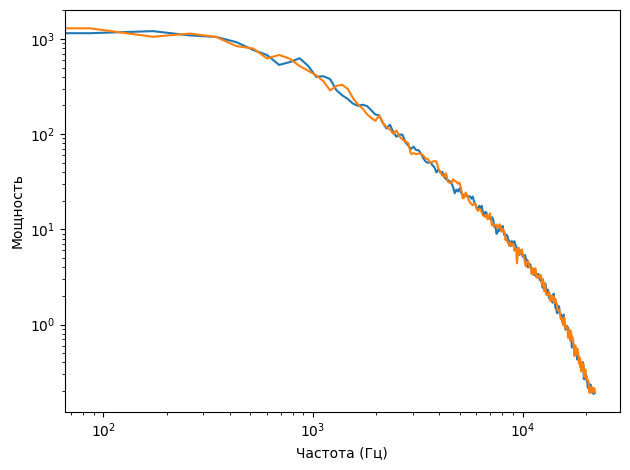

In [29]:
wind_res.plot_power()
wind_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

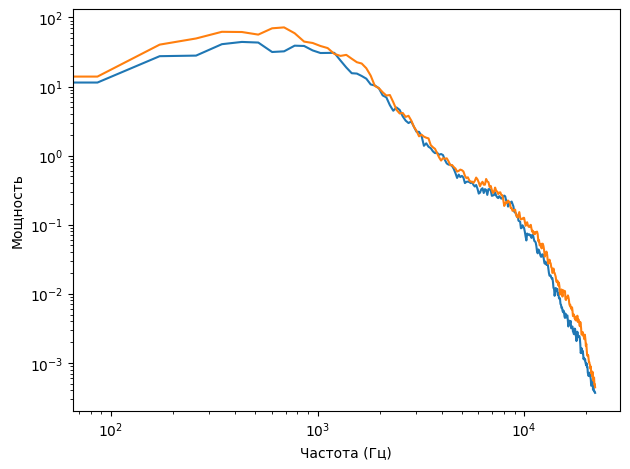

In [30]:
creek_res.plot_power()
creek_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

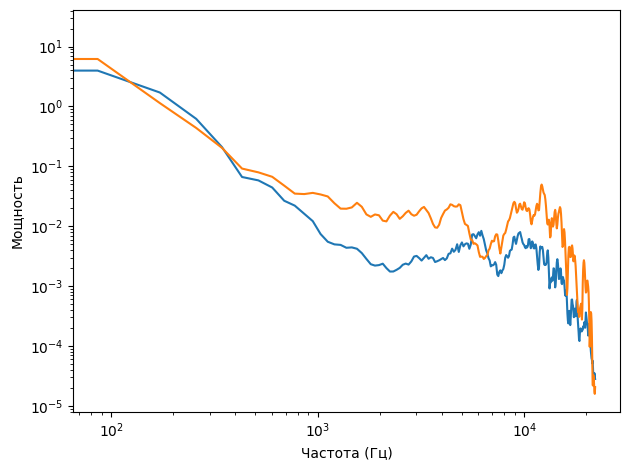

In [31]:
fire_res.plot_power()
fire_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

Данный метод позволяет нам наглядно видеть зависимость между частотами и мощностью.

По графикам оказалось, что структура у спектров более сложная и трудносопоставляемая с конкретным шумом. Так, например, звук дождя уже нельзя однозначно считать красным, хотя общая структура графика очень похожа. Звук ручья в целом, как и было сказано выше, после определенного значения частоты похож на красный. Ну а график костра в начале, может быть, и напоминает красный, но после середины он больше похож уже на розовый.

# Упражнение 4.3
На веб-странице http://www.coindesk.com/price можно скачать в ввиде CSV-файла исторические данные о ежедневной цене BitCoin. Откройте этот файл и вычислите спектр цен BitCoin как функцию времени. Похоже ли это на белый, розовый или броуновский шум?

In [32]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv


--2024-03-31 18:12:13--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv [following]
--2024-03-31 18:12:13--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143622 (140K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 140.26K  --.-KB/s    in 0.02

Скачиваем данные за 2013-2020 год.

In [33]:
col_names = ["Closing Price (USD)", "Timestamp"]
data = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates=[0])
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


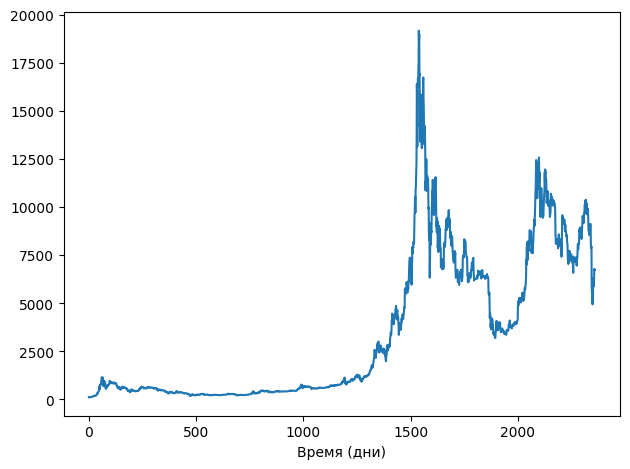

In [34]:
btc_wave = Wave(data['Closing Price (USD)'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время (дни)')

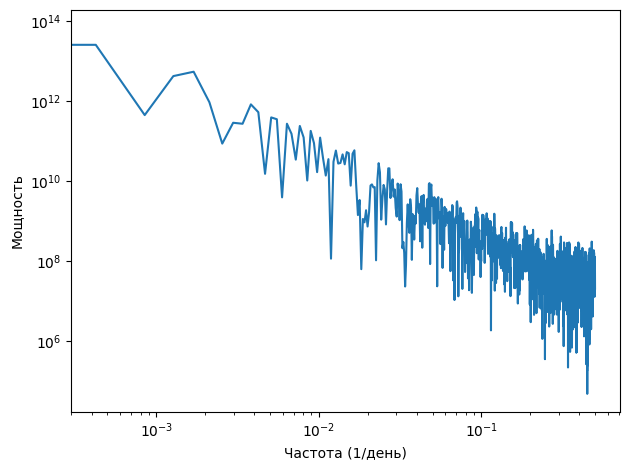

In [35]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Частота (1/день)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [36]:
btc_spectrum.estimate_slope().slope

-1.7332540936758951

По графику можем увидеть, что частота и мощность связаны линейно, таким образом, можно сделать вывод, что это похоже на Броуновский (красный) шум. Также об этом нам говорит значение наклона - 1.7, что близко к данному шуму.

# Упражнение 4.4
Счетчик Гейгера - прибор для обнаружения радиации. Когда ионизирующие частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.

Напишите класс, называемый UncorrelatedPoissonNoise, наследующий thinkdsp._Noise и предоставляющий evaluate. Следует использовать Np.random.poisson для генерации случайный величин из распределения Пуассона. Параметр этой функции lam - это среднее число частиц за время каждого интервала. Можно использовать атрибут amp для определения lam. Например, при частоте кадров 10 кГц и amp 0,001 получится около 10 "щелчков" в секунду.

Сгенерируйте пару секунд UP и прослушайте. Для малых значений amp, например 0,001, звук будет как у счетчика Гейгера. При больших значениях он будет похож на белый шум. Вычислите и напечатайте спектр мощности и посмотрите, так ли это.

In [37]:
class UncorrelatedPoissonNoise(Noise):

  def evaluate(self, ts):
    ys = np.random.poisson(self.amp, len(ts))
    return ys

Согласно заданию сгенерируем данный шум для малых и больших значениях amp и посмотрим совпали ли звуки с ожидаемыми.

In [38]:
like_geiger_signal = UncorrelatedPoissonNoise(amp=0.001)
like_geiger_wave = like_geiger_signal.make_wave(duration=2.0, framerate=10000)
like_white_noise_signal = UncorrelatedPoissonNoise(amp=1)
like_white_noise_wave = like_white_noise_signal.make_wave(duration=2.0, framerate=10000)

like_geiger_wave.make_audio()

In [39]:
like_white_noise_wave.make_audio()

Первый звук в действительности похож на трещание счетчика Гейгера, а во втором можем услышать просто монотонный шум.

Сравним графики и спектры сигналов:

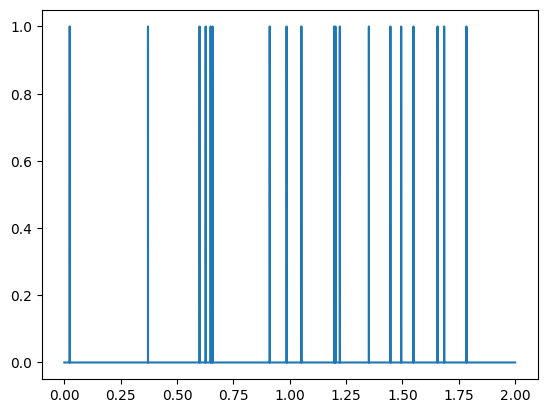

In [40]:
like_geiger_wave.plot()

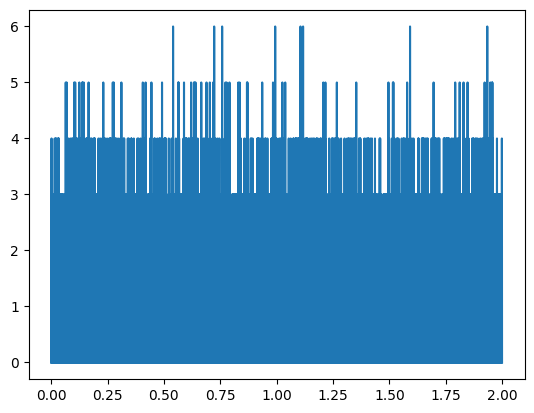

In [41]:
like_white_noise_wave.plot()

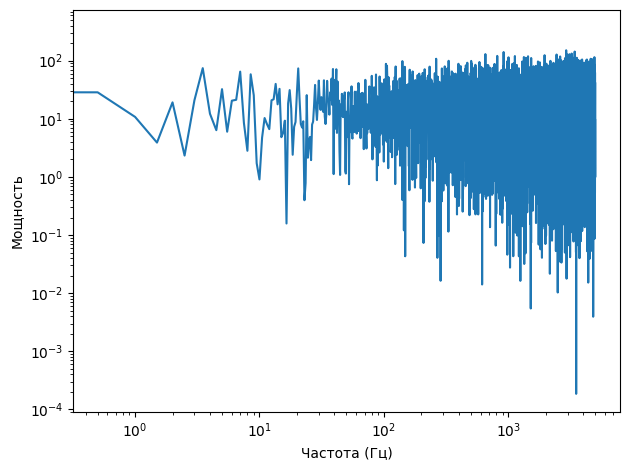

In [42]:
like_geiger_spectrum = like_geiger_wave.make_spectrum()
like_geiger_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [43]:
like_geiger_spectrum.estimate_slope().slope

-0.011727839100773596

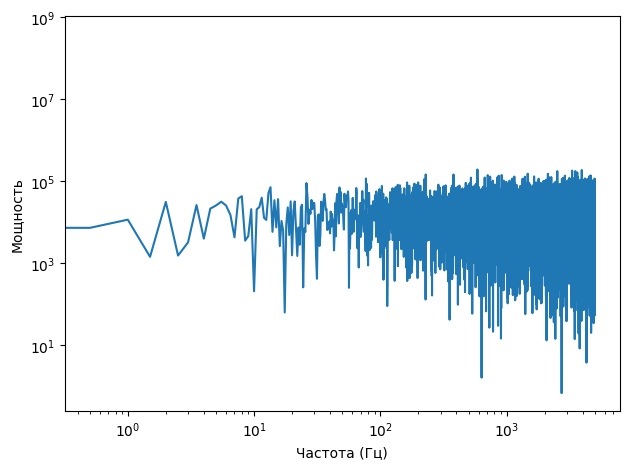

In [44]:
like_white_noise_spectrum = like_white_noise_wave.make_spectrum()
like_white_noise_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [45]:
like_white_noise_spectrum.estimate_slope().slope

-0.012460827747552505

Из графиков можем увидеть, что с изменением частоты мощность в целом не меняется, также видим, что наклон у сигналов примерно 0. Исходя их этих фактов понимаем, что оба звука можно считать белым шумом.

# Упражнение 4.5
В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существет более эффективные варианты, например алгоритм Voss-McCartney. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношения между мощностью и частотой соответсвующие.

In [46]:
def voss_pink_noise(rows, columns=16):
  array = np.empty((rows, columns))
  array.fill(np.nan)
  array[0, :] = np.random.random(columns)
  array[:, 0] = np.random.random(rows)

  cols = np.random.geometric(0.5, rows)
  cols[cols >= columns] = 0
  new_rows = np.random.randint(rows, size=rows)
  array[new_rows, cols] = np.random.random(rows)

  data = pd.DataFrame(array)
  data.fillna(method='ffill', axis=0, inplace=True)
  total = data.sum(axis=1)

  return total.values

Проверим данный алгоритм с 10000 значениями:

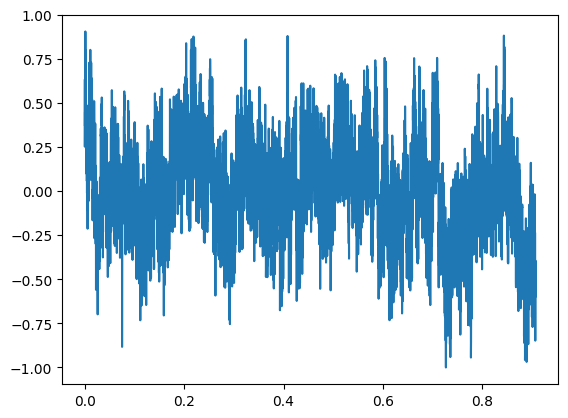

In [47]:
ys = voss_pink_noise(10000)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [48]:
wave.make_audio()

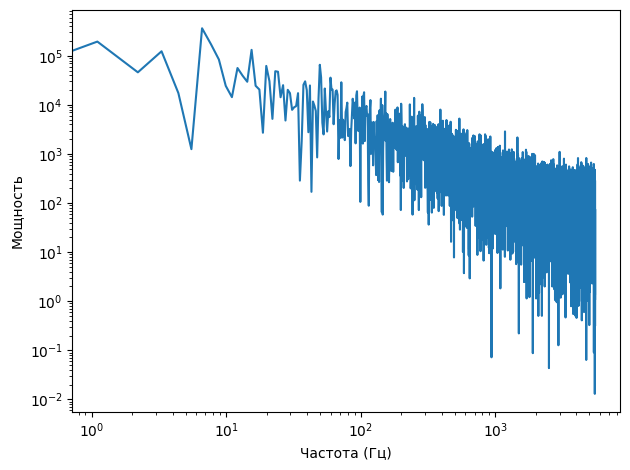

In [49]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [50]:
spectrum.estimate_slope().slope

-1.0291205067113665

По графику спектра в логарифмическом масштабе и по значению уклона, равное -1, можем сделать вывод, что получили действительно розовый шум.